In [2]:
%matplotlib inline
import csv
import numpy as np

pcafields = ['PC' + str(x) for x in range(1,15)]

pca = list()
with open('nb/quarterlypca.csv', encoding = 'utf-8') as f:
    reader = csv.DictReader(f)
    for row in reader:
        newpcarow = []
        for field in pcafields:
            newpcarow.append(float(row[field]))
        pca.append(newpcarow)

pca = np.array(pca)

    

In [3]:
from scipy import spatial

def distance_matrix(pca):
    observations, dimensions = pca.shape
    distmat = np.zeros((observations, observations))
    for i in range(observations):
        for j in range(observations):
            dist = spatial.distance.cosine(pca[i], pca[j])
            distmat[i, j] = dist
    return distmat

d = distance_matrix(pca)    

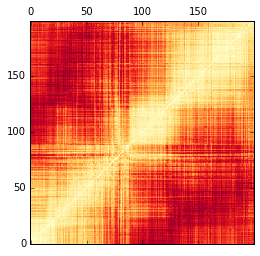

In [4]:
import matplotlib.pyplot as plt
plt.matshow(d, origin = 'lower', cmap = plt.cm.YlOrRd)
plt.show()

/Users/tunder/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


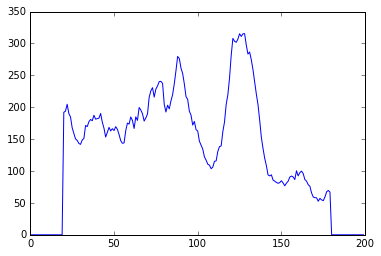

315.452941139


In [5]:
def make_foote(quart):
    tophalf = [-1] * quart + [1] * quart
    bottomhalf = [1] * quart + [-1] * quart
    foote = list()
    for i in range(quart):
        foote.append(tophalf)
    for i in range(quart):
        foote.append(bottomhalf)
    foote = np.array(foote)
    return foote

foote5 = make_foote(20)
# This gives us a Foote matrix with a five-year half-width.

def foote_novelty(distmat, foote):
    axis1, axis2 = distmat.shape
    assert axis1 == axis2
    distsize = axis1
    
    axis1, axis2 = foote.shape
    assert axis1 == axis2
    halfwidth = axis1 / 2
    
    novelties = []
    
    for i in range(distsize):
        
        start = i - halfwidth
        end = i + halfwidth
        
        if start < 0 or end > (distsize - 1):
            novelties.append(0)
        else:
            novelties.append(np.sum(foote * distmat[start: end, start: end]))
    
    return novelties

novelties = foote_novelty(d, foote5)
plt.plot(novelties)
plt.show()
print(np.max(novelties))

In [6]:
randomized = np.array(pca)
permuted_peaks = []
for i in range(100):
    np.random.shuffle(randomized)
    randdist = distance_matrix(randomized)
    novelties = foote_novelty(randdist, foote5)
    permuted_peaks.append(np.max(novelties))

print(permuted_peaks)

[147.127888436717, 121.94176538803876, 109.16671860614547, 115.15060885206306, 146.90599262218279, 131.51589984808589, 89.823467853837684, 125.8600588178729, 188.66972212934206, 123.63855350063361, 142.35070761642541, 81.970600568059865, 107.07339548984083, 93.966054999240612, 88.627153009570804, 98.437892174031106, 151.68232140415617, 155.08368015387447, 191.04997428560714, 147.57562771318936, 115.51849112118768, 152.53460924800862, 116.95790217713804, 131.04847061478659, 139.39812409868475, 155.80709263758399, 136.12882689101718, 174.88537616818661, 112.22612381006495, 110.86555856432166, 124.39444262904193, 141.12384862793613, 152.64343308828063, 117.25385214447496, 117.61436039551374, 120.8811952655094, 179.65698346956148, 114.75717774534692, 135.77466847696689, 135.50024947176763, 111.93786372882363, 128.98903101261328, 67.992954205534843, 135.15196571673818, 227.39846839632307, 142.50109121521373, 139.33434084345404, 208.4149239301629, 198.11284363964069, 108.38680240180852, 194.

/Users/tunder/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


100
[298.52435029820106, 227.39846839632307, 226.65158530899132, 217.02212135279467, 215.92860926664514]


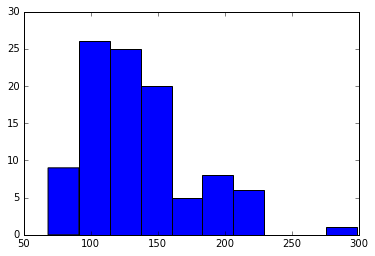

In [7]:
print(len(permuted_peaks))
permuted_peaks.sort(reverse = True)
print(permuted_peaks[0:5])
plt.hist(permuted_peaks)
plt.show()

/Users/tunder/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


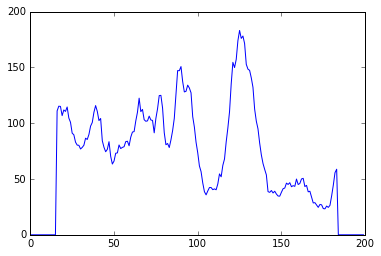

Four-year half-width:183.107990187


In [8]:
foote4 = make_foote(16)
novelties = foote_novelty(d, foote4)
plt.plot(novelties)
plt.show()
print("Four-year half-width:" + str(np.max(novelties)))

In [9]:
permuted_peaks = []
for i in range(100):
    np.random.shuffle(randomized)
    randdist = distance_matrix(randomized)
    novelties = foote_novelty(randdist, foote4)
    permuted_peaks.append(np.max(novelties))

print(len(permuted_peaks))
permuted_peaks.sort(reverse = True)
print(permuted_peaks[0:5])

100
[236.60219349451981, 234.17676725958796, 228.27777783487431, 189.00948267896086, 182.73130882280284]


/Users/tunder/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [12]:
foote4.shape

(32, 32)

In [13]:
with open('toptenfootes.csv', mode = 'w') as f:
    writer = csv.writer(f)
    for quarters in range(12, 40):
        thisfoote = make_foote(quarters)
        these_maxima = []
        for i in range(100):
            np.random.shuffle(randomized)
            rd = distance_matrix(randomized)
            novelties = foote_novelty(rd, thisfoote)
            these_maxima.append(np.max(novelties))
        these_maxima.sort(reverse = True)
        outrow = [quarters]
        outrow.extend(these_maxima[0:10])
        writer.writerow(outrow)
        print(outrow)

[12, 177.11792539211081, 150.13452801093143, 145.70233557442734, 144.27871624681828, 131.38659153582989, 129.03216478993772, 128.46901981441027, 124.52126297156678, 123.47369255308642, 122.48036173268147]


/Users/tunder/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


KeyboardInterrupt: 

In [ ]:
with open('realfootes.csv', mode='w', encoding = 'utf-8') as f:
    writer = csv.writer(f)
    for quarters in range(12, 40):
        thisfoote = make_foote(quarters)
        d = distance_matrix(pca)
        novelties = foote_novelty(d, thisfoote)
        outrow = [quarters]
        outrow.extend(novelties)
        writer.writerow(outrow)

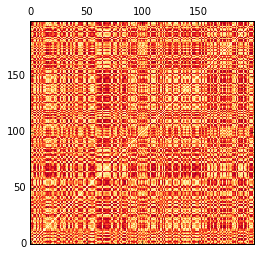

In [15]:
plt.matshow(randdist, origin = 'lower', cmap = plt.cm.YlOrRd)
plt.show()